In [2]:
import pymysql.cursors
import os
from dotenv  import load_dotenv
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import swiftmarket

In [3]:
load_dotenv()

host = os.getenv('HOST')
user = os.getenv('USER')
password = os.getenv('PASSWORD')
database = os.getenv('DATABASE')

In [4]:
connection = pymysql.connect(user=user,
host = host,
password =password,
database =database)

In [5]:
cursor = connection.cursor()

In [71]:
# 1. identify the top-performing sales representatives based on their total sales volume in january

In [66]:
query = '''select employees.firstname ,
monthname(S.SaleDate) as monthname,sum(totalPrice) as totalprice from salesdata S
join employees 
on s.EmployeeID = employees.EmployeeID
where monthname(S.SaleDate) = 'January'
group by monthname(S.SaleDate),employees.firstname
order by totalprice desc
limit 10;'''

In [67]:
df = swiftmarket.select_query(query)

In [68]:
df

,firstname,monthname,totalprice
0,Bhavin,January,5775952.00
1,Nitara,January,5567036.00
2,Myra,January,4888628.00
3,Renee,January,3924716.00
4,Shray,January,3719152.00
5,Yuvaan,January,3348039.00
6,Anika,January,3152408.00
7,Kiaan,January,3136727.00
8,Yasmin,January,3135779.00
9,Hiran,January,3104523.00


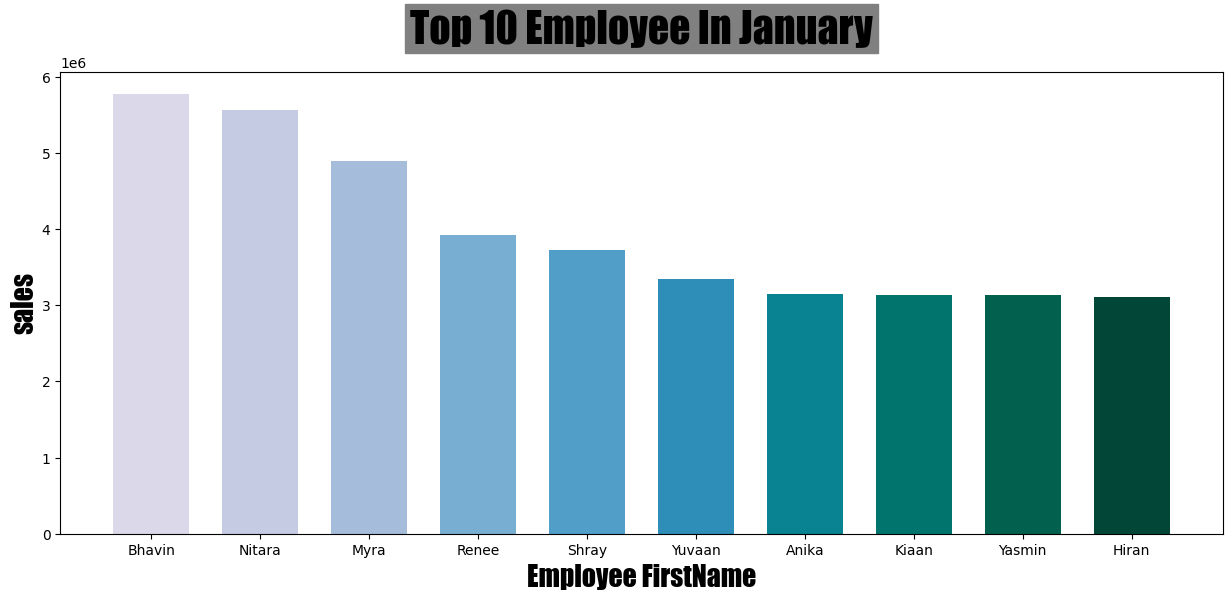

In [75]:
seq= np.linspace(0.2,1,10)
cm = plt.cm.PuBuGn(seq)

plt.figure(figsize = (15,6))
plt.bar(df['firstname'],df['totalprice'],width = 0.7,color = cm)
plt.xlabel('Employee FirstName',size=20,fontname='impact')
plt.ylabel('sales',size=20,fontname='impact')
plt.title('Top 10 Employee In January',fontsize=30,fontname='impact',backgroundcolor= 'grey',pad = 20)
plt.show()

In [6]:
query = '''SELECT
 MONTHNAME(SaleDate) AS Month,
 SUM(TotalPrice) AS DailySales
 FROM Salesdata
 GROUP BY MONTH(SaleDate),MONTHNAME(SaleDate)
 ORDER BY MONTH(SaleDate),MONTHNAME(SaleDate);'''

In [7]:
df= swiftmarket.select_query(query)

In [8]:
df

,Month,DailySales
0,January,155340130.00
1,February,140345189.00
2,March,151612551.00
3,April,150691604.00
4,May,163734120.00
5,June,143529379.00
6,July,149811843.00
7,August,158477094.00
8,September,146743920.00
9,October,143488837.00


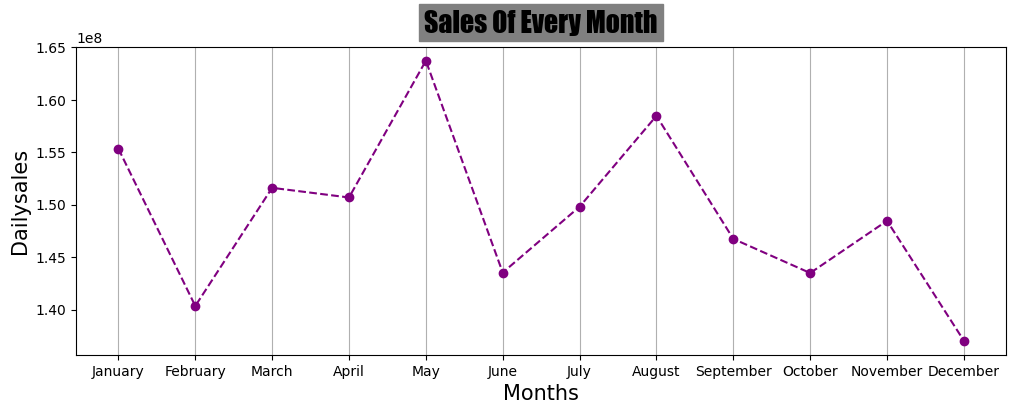

In [15]:
plt.figure(figsize=(12,4))

plt.plot(df['Month'],df['DailySales'],marker='o',color='purple',ls = 'dashed')

plt.title('Sales Of Every Month',fontsize=20,fontname='impact',pad=10,backgroundcolor='grey')
plt.grid(axis='x')
plt.xlabel('Months',size = 15)
plt.ylabel('Dailysales',size = 15)

plt.show()

In [16]:
query = '''select months,AVG(monthlysales) OVER (ORDER BY monthnum ROWS BETWEEN 3 PRECEDING AND CURRENT ROW) AS MovingAverage
 from
 (SELECT
 month(saledate) monthnum,
 monthname(SaleDate) as months,
 sum(totalprice) as monthlysales
 FROM Salesdata
 Group by month(saledate),monthname(saledate)) t;'''

In [17]:
df= swiftmarket.select_query(query)

In [18]:
df

,months,MovingAverage
0,January,155340130.000000
1,February,147842659.500000
2,March,149099290.000000
3,April,149497368.500000
4,May,151595866.000000
5,June,152391913.500000
6,July,151941736.500000
7,August,153888109.000000
8,September,149640559.000000
9,October,149630423.500000


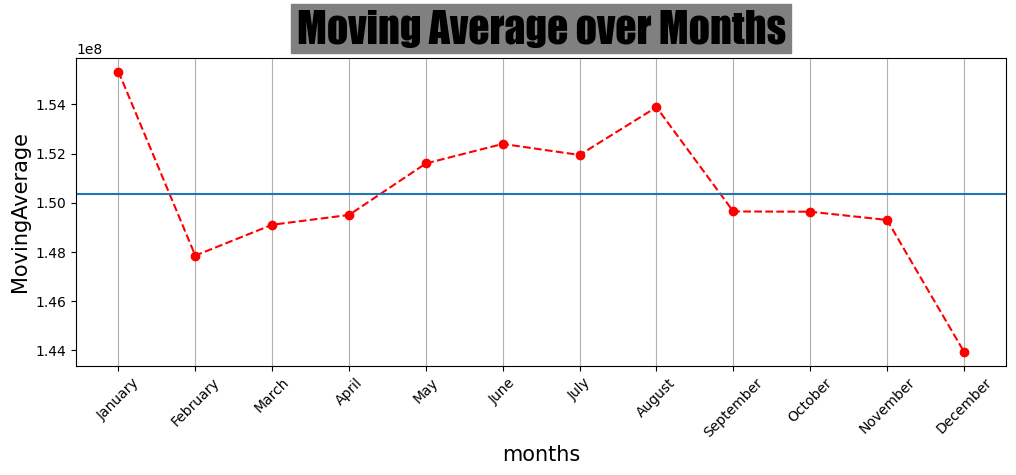

In [22]:
plt.figure(figsize = (12,4))

plt.plot(df['months'],df['MovingAverage'],marker = 'o',color='red',linestyle='dashed')

plt.axhline(y=np.mean(df['MovingAverage']))

plt.title('Moving Average over Months',fontsize=30,fontname='impact',pad=10,backgroundcolor='grey')
plt.ylabel('MovingAverage',size = 15)
plt.xlabel('months',size = 15)
plt.grid(axis='x')
plt.xticks(rotation=45)
plt.show()

In [34]:
query= '''SELECT
 MONTH(SaleDate) AS Monthnum,
 monthname(saledate) as months,
 100*(SUM(TotalPrice)-LAG(SUM(TotalPrice)) OVER (ORDER BY
 MONTH(SaleDate)))/
 LAG(SUM(TotalPrice)) OVER (ORDER BY MONTH(SaleDate))AS
 'growthrate in %'
 FROM Salesdata
 GROUP BY YEAR(SaleDate), MONTH(SaleDate),monthname(saledate)
 ORDER BY YEAR(SaleDate), MONTH(SaleDate),monthname(saledate);'''

In [35]:
df = swiftmarket.select_query(query)

In [36]:
df

,Monthnum,months,growthrate in %
0,1,January,None
1,2,February,-9.652973
2,3,March,8.028321
3,4,April,-0.607435
4,5,May,8.655105
5,6,June,-12.339970
6,7,July,4.377128
7,8,August,5.784089
8,9,September,-7.403703
9,10,October,-2.218206


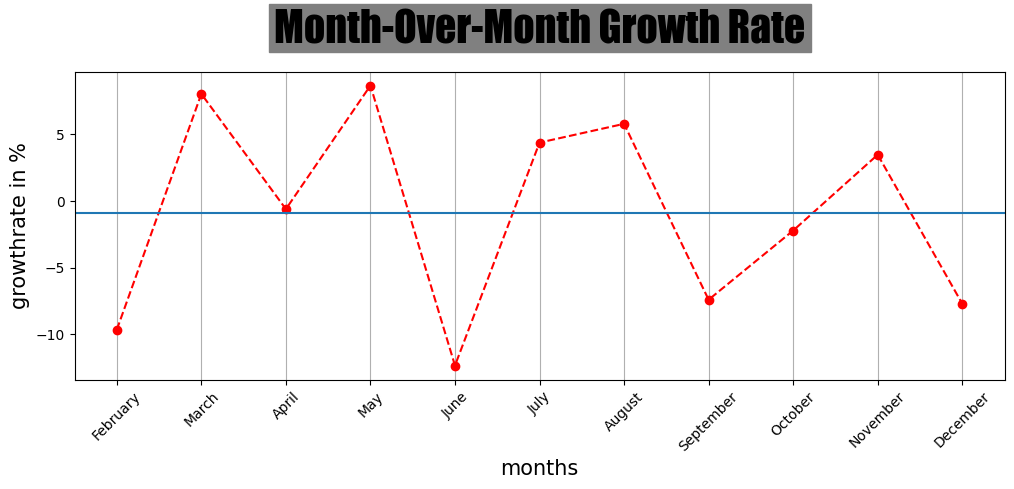

In [41]:
plt.figure(figsize = (12,4))

plt.plot(df['months'],df['growthrate in %'],marker = 'o',color='red',linestyle='dashed')

plt.axhline(y=np.mean(df['growthrate in %']))

plt.title('Month-Over-Month Growth Rate',fontsize=30,fontname='impact',pad=20,backgroundcolor='grey')
plt.ylabel('growthrate in %',size = 15)
plt.xlabel('months',size = 15)
plt.grid(axis='x')
plt.xticks(rotation=45)
plt.show()

In [43]:
# 4. identify the top-performing sales representatives based on their total sales volume

In [44]:
query='''select t.employeeid,e.firstname,t.totalsales
 from
 (select employeeid,sum(totalprice) as totalsales
 from salesdata
 group by EmployeeID) t
 join employees e
 on t.employeeid=e.EmployeeID
 order by t.totalsales desc
 limit 10;'''

In [45]:
df = swiftmarket.select_query(query)

In [46]:
df

,employeeid,firstname,totalsales
0,1115,Yuvaan,20895341.00
1,1017,Tiya,19035834.00
2,1029,Shaan,18649467.00
3,1074,Stuvan,18333919.00
4,1001,Fateh,18231579.00
5,1113,Mannat,18104646.00
6,1059,Piya,18054949.00
7,1053,Kiaan,18049630.00
8,1002,Chirag,18042772.00
9,1097,Abram,17873130.00


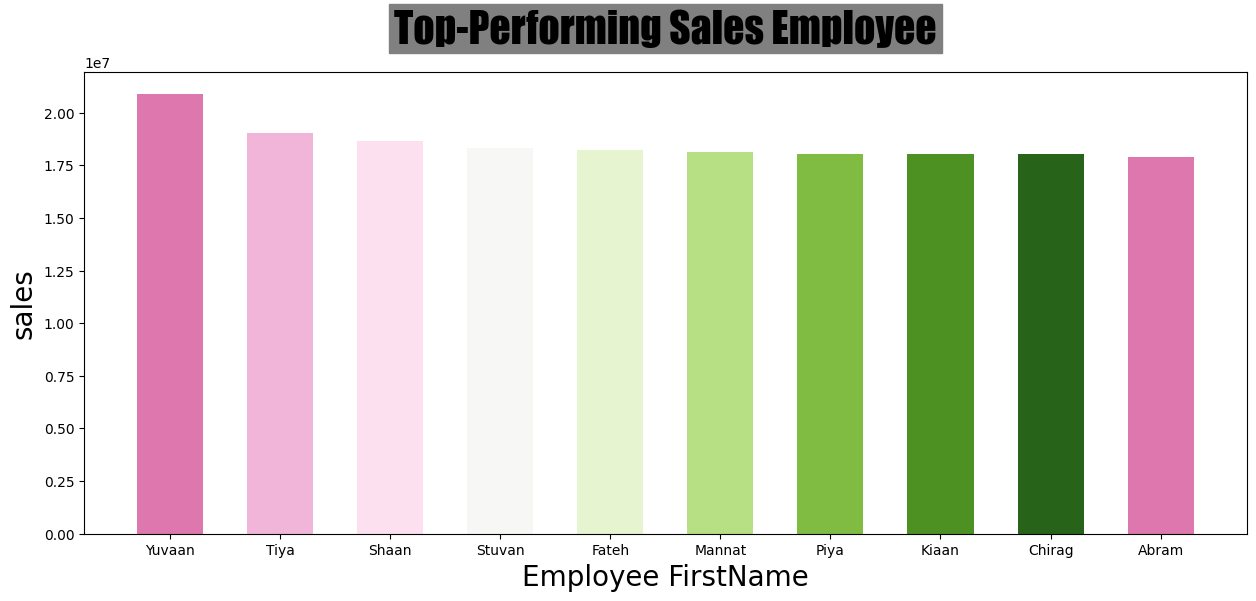

In [54]:
seq= np.linspace(0.2,1,9)
cm = plt.cm.PiYG(seq)

plt.figure(figsize = (15,6))
plt.bar(df['firstname'],df['totalsales'],width = 0.6,color =cm)

plt.title('Top-Performing Sales Employee',fontsize=30,fontname='impact',pad=20,backgroundcolor='grey')
plt.xlabel('Employee FirstName',size=20)
plt.ylabel('sales',size=20)
plt.show()

In [77]:
# 5. What are the total sales made by each employee?

In [78]:
query = '''select concat(FirstName,' ',LastName) as fullname ,sum(TotalPrice)  as totalsales from salesdata
join employees on salesdata.Employeeid = employees.Employeeid
group by employees.employeeid
order by sum(quantity) desc
limit 10;'''

In [79]:
df = swiftmarket.select_query(query)

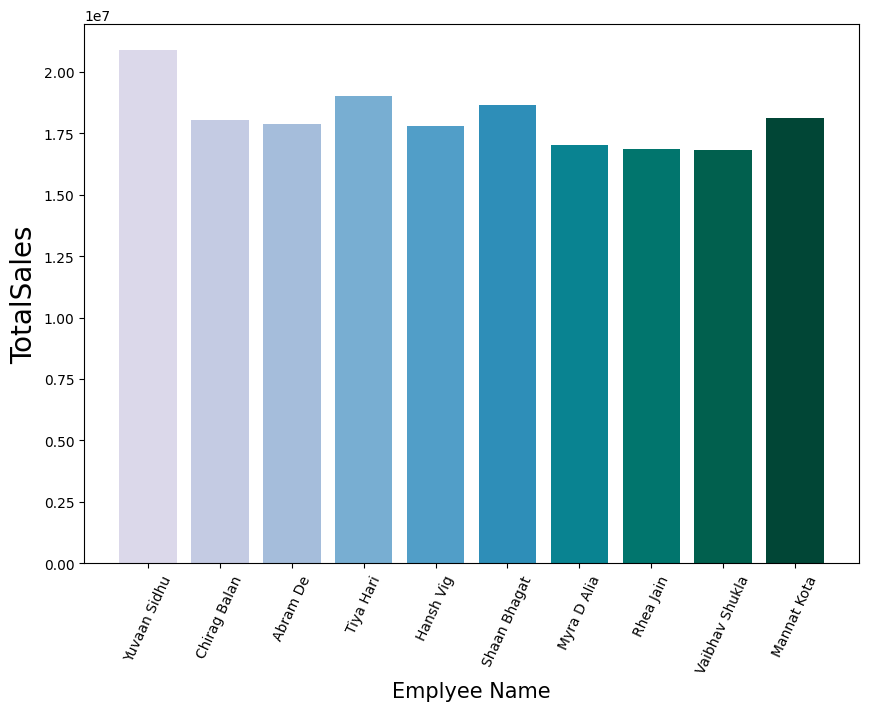

In [87]:
plt.figure(figsize=(10,7))

seq= np.linspace(0.2,1,10)
cm = plt.cm.PuBuGn(seq)
plt.bar(df['fullname'],df['totalsales'],color = cm)


plt.xlabel('Emplyee Name',size=15)
plt.ylabel('TotalSales',size=20)
plt.xticks(rotation=65)

plt.show()

In [88]:
# 6. Which category has the highest total sales?

In [89]:
query = '''select categories.categoryid,CategoryName,sum(price) total_sales_price from subcategories
join 
(select subcatid,sum(totalprice) as price from salesdata
group by SubcatID) t
 on t.subcatid = subcategories.subcatid
join categories
on categories.CategoryID = subcategories.CategoryID
group by categories.CategoryID
order by total_sales_price desc'''

In [90]:
df = swiftmarket.select_query(query)

In [95]:
la = ['Pet supplies and Accessories','Health and Wellness Products','Electronics and Gadgets','Books and Educational Materials','Home and Kitchen Appliances','Outdoor and Sports Equipment']

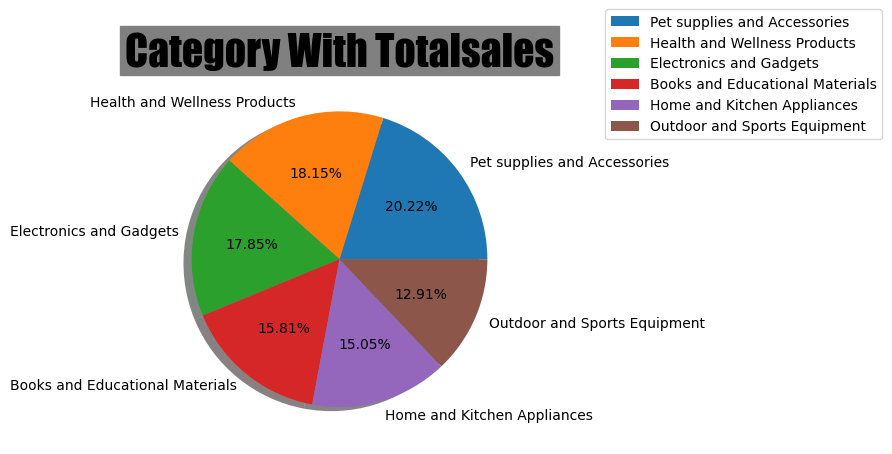

In [109]:
plt.pie(df['total_sales_price'],labels=la,autopct='%1.2f%%',
        shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9})

plt.title('Category With Totalsales',fontname = 'impact',fontsize=30,backgroundcolor = 'grey')

plt.legend(loc = "center left",
          bbox_to_anchor=(1.2, 0.3,1, 1.4))
plt.show()

In [110]:
# 7. How many customers are there in each state?

In [157]:
query = '''select State,count(customerid) as  totalcustomers from customers
group by state
order by totalcustomers desc ;'''

In [158]:
df = swiftmarket.select_query(query)

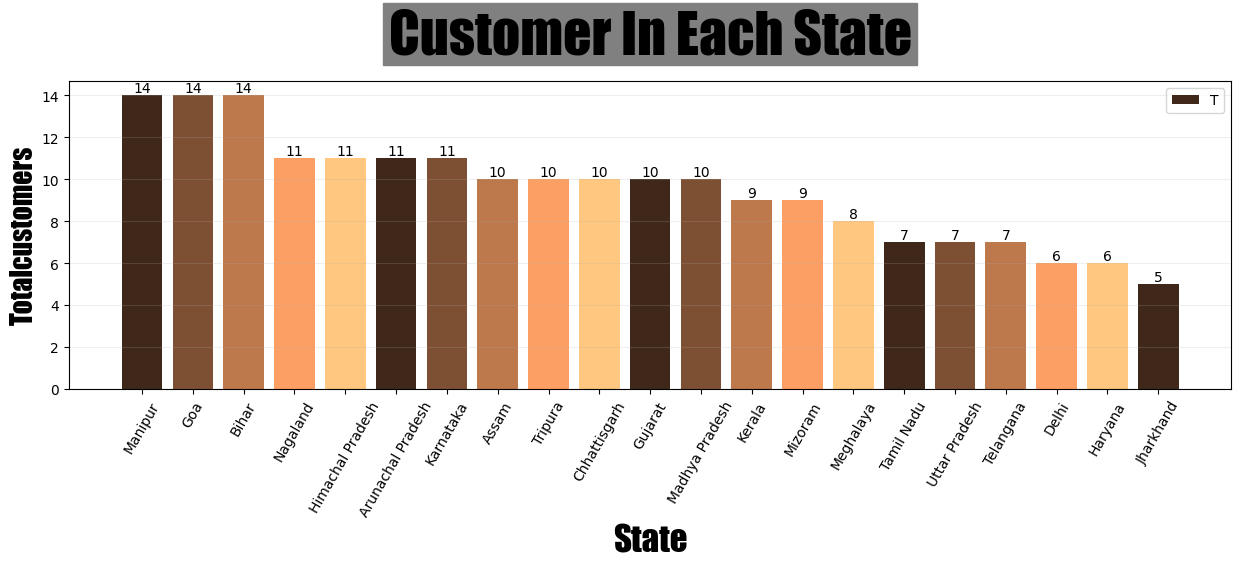

In [159]:
plt.figure(figsize = (15,4))

seq= np.linspace(0.2,1,5)
cm = plt.cm.copper(seq)


plt.bar(df['State'],df['totalcustomers'],color = cm)

for  i in range(len(df['State'])):
    plt.annotate(text = df['totalcustomers'][i],xy = (i,df['totalcustomers'][i]),horizontalalignment='center',verticalalignment='bottom')


plt.xticks(rotation= 60)

plt.title('Customer In Each State',fontname = 'impact',fontsize=40,backgroundcolor='grey',pad = 20)
plt.xlabel('State',fontsize=25,fontname= 'impact')
plt.ylabel('Totalcustomers',size = 20,fontname='impact')
plt.grid(axis = 'y',alpha = 0.2)
plt.legend('Totalcustomers')



plt.show()

In [126]:
# 8. What is the average quantity of each product sold?

In [160]:
query = '''SELECT
 s.SubcatID,
 sb.SubcatName,
 AVG(Quantity) AS AvgQuantitySold
 FROM Salesdata s
 join subcategories sb on s.subcatid=sb.SubcatID
 GROUP BY s.SubcatID,sb.subcatname
 order by AvgQuantitySold desc
 limit 10;'''

In [161]:
df = swiftmarket.select_query(query)

In [162]:
df

,SubcatID,SubcatName,AvgQuantitySold
0,6017,Resistance bands,3.1587
1,6024,Workbooks,3.1496
2,6011,Camping tent,3.1071
3,6019,Foam roller,3.0980
4,6005,Portable power banks,3.0974
5,6002,Laptops,3.0821
6,6014,Bicycle,3.0703
7,6026,Dog/cat food,3.0673
8,6021,Fiction novels,3.0637
9,6028,Pet beds,3.0504


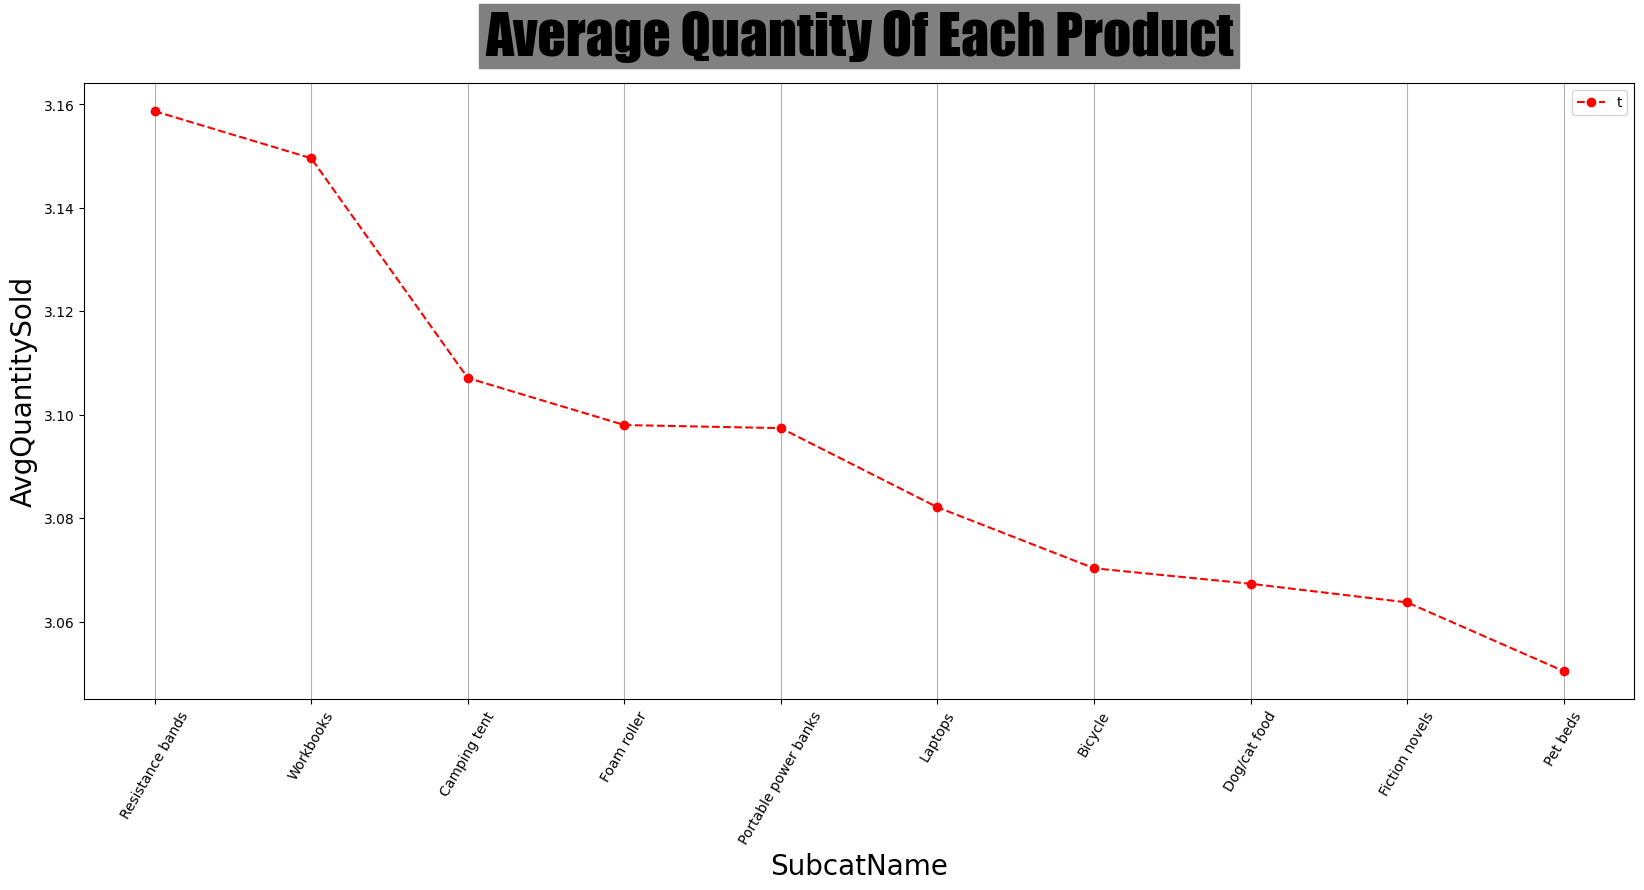

In [163]:
plt.figure(figsize=(20,8))
plt.plot(df['SubcatName'],df['AvgQuantitySold'],marker = 'o',ls='dashed',color='red')
plt.grid(axis='x')
plt.xticks(rotation=60)
plt.title('Average Quantity Of Each Product',fontsize=40,fontname='impact',backgroundcolor='grey',pad=20)
plt.xlabel('SubcatName',size=20)
plt.ylabel('AvgQuantitySold',size = 20)
plt.legend('totalsales')
plt.show()

In [164]:
# 9. Which supplier has the highest total sales?

In [165]:
query= '''select  SupplierName,sum(totalprice) as total_sales from  salesdata 
join subcategories sc
on salesdata.SubcatID = sc.SubcatID 
JOIN Suppliers su ON sc.SupplierID = su.SupplierID
group by SupplierName
order by total_sales asc;'''

In [166]:
df = swiftmarket.select_query(query)

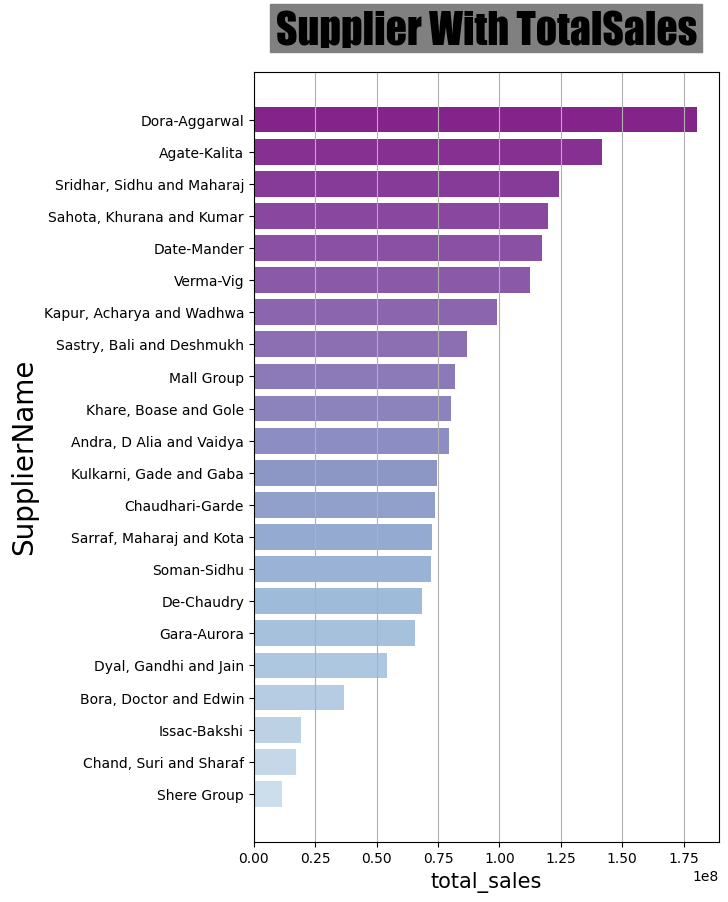

In [182]:
plt.figure(figsize=(6,10))
seq= np.linspace(0.2,1,28)
cm = plt.cm.BuPu(seq)

plt.barh(df['SupplierName'],df['total_sales'],color = cm)

plt.title('Supplier With TotalSales',fontsize=30,fontname='impact',backgroundcolor='grey',pad=20)
plt.ylabel('SupplierName',size =20)
plt.xlabel('total_sales',size = 15)

plt.grid(axis='x')
plt.show()

In [183]:
# 10. What is the total revenue generated from sales in each state?

In [184]:
query = '''select State,sum(totalprice) as TotalRevenue from customers join salesdata
on customers.CustomerID = salesdata.CustomerID
group by State;'''

In [185]:
df = swiftmarket.select_query(query)

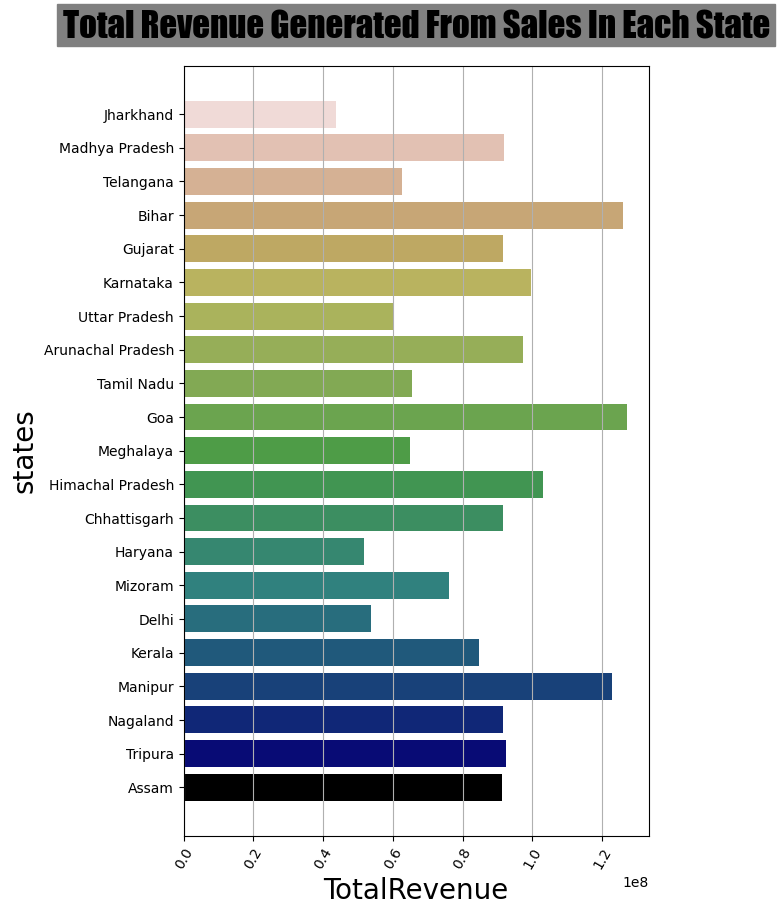

In [208]:
plt.figure(figsize = (6,10))
seq= np.linspace(0,1,22)
cm = plt.cm.gist_earth(seq)


plt.barh(df['State'],df['TotalRevenue'],color=cm)


plt.title('Total Revenue Generated From Sales In Each State',fontsize = 25,color = 'black',
          backgroundcolor = 'grey',
          pad = 20,
          fontname = 'impact')
plt.ylabel('states',size = 20)
plt.xlabel('TotalRevenue',size=20)
plt.xticks(rotation = 60,color = 'black')

plt.grid(axis='x')
plt.show()

In [209]:
# 11. How many sales were made by each customer?

In [210]:
query = '''SELECT
 s.CustomerID,
 c.firstname,
 COUNT(*) AS TotalSales
 FROM Salesdata s
 join customers c
 on s.CustomerID=c.CustomerID
 GROUP BY s.CustomerID,c.firstname
 order by TotalSales desc
 limit 20;'''

In [211]:
df = swiftmarket.select_query(query)

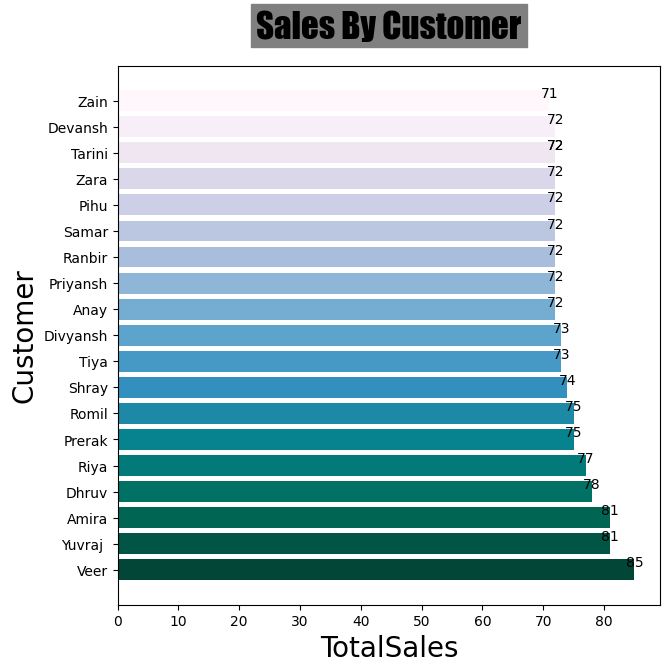

In [248]:
plt.figure(figsize=(7,7))

seq= np.linspace(1,0,20)
cm = plt.cm.PuBuGn(seq)

plt.barh(df['firstname'],df['TotalSales'],color = cm)

for  i in range(len(df['firstname'])):
    plt.annotate(text = df['TotalSales'][i],xy = (df['TotalSales'][i],df['firstname'][i])
                 ,horizontalalignment='center',verticalalignment='bottom')

plt.title('Sales By Customer',fontsize = 25,color = 'black',
          backgroundcolor = 'grey',
          pad = 20,
          fontname = 'impact')
plt.xlabel('TotalSales',fontsize =20)
plt.ylabel('Customer',fontsize=20)
plt.show()

In [249]:
# 12. What is the total salary expenditure on employees in each department?

In [253]:
query = '''select Department,sum(salary) from employees
group by Department;'''

In [254]:
df = swiftmarket.select_query(query)

In [255]:
df

,Department,sum(salary)
0,Marketing,469413.37
1,Legal,577095.43
2,Accounts,445848.85
3,Logistics,365835.92
4,Sales,325662.92
5,ML Engineer,652081.28
6,HR Admin,482618.09
7,Engineering,393266.08
8,Analyst,732044.77
9,IT,351627.51


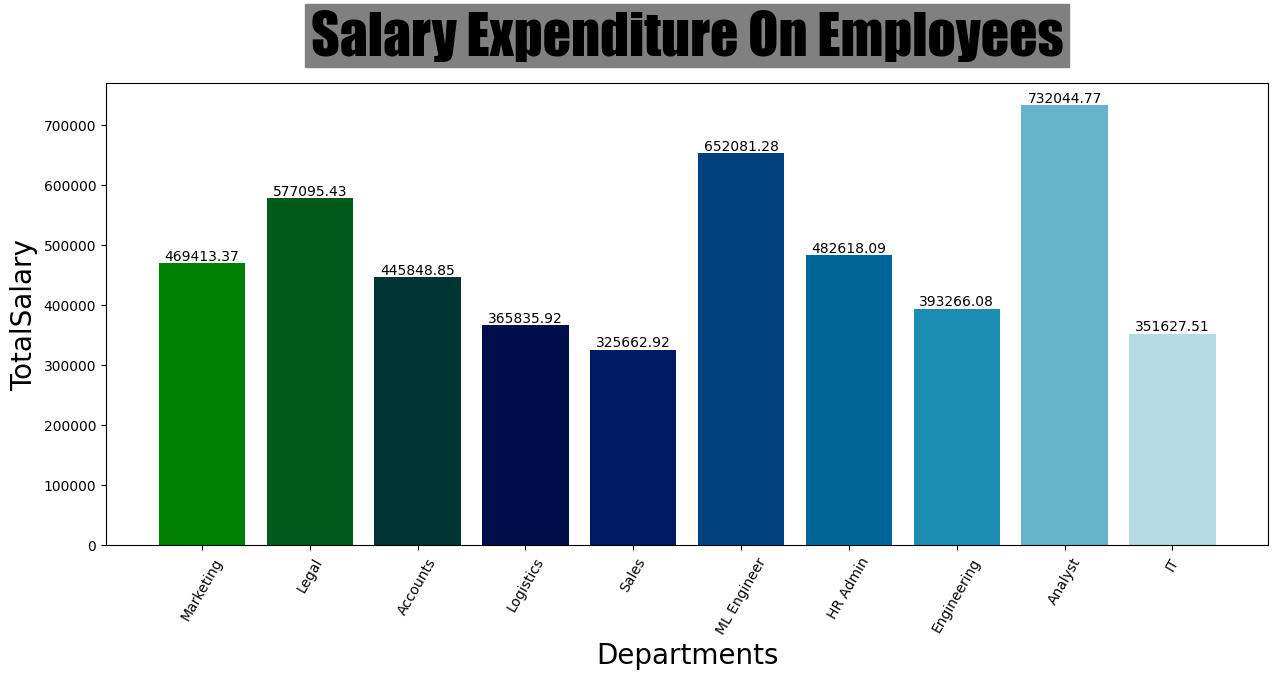

In [267]:
plt.figure(figsize = (15,6))

seq= np.linspace(0,1,11)
cm = plt.cm.ocean(seq)


plt.bar(df['Department'],df['sum(salary)'],color=cm)

for i in range(len(df['Department'])):
    plt.annotate(text=df['sum(salary)'][i],xy=(i,df['sum(salary)'][i])
                 ,horizontalalignment='center',verticalalignment='bottom')

plt.xticks(rotation = 60)
plt.title('Salary Expenditure On Employees',fontsize = 40,color = 'black',
          backgroundcolor = 'grey',
          pad = 20,
          fontname = 'impact')
plt.ylabel('TotalSalary',fontsize=20)
plt.xlabel('Departments',fontsize=20)


plt.show()

In [268]:
# 13. Which subcategory has the highest average unit price?

In [284]:
query = ''' SELECT
 SubcatName,
 round(AVG(UnitPrice)) AS AvgSellingPrice
 FROM Subcategories
 GROUP BY SubcatName
 ORDER BY AvgSellingPrice DESC
 limit 5;'''

In [285]:
df = swiftmarket.select_query(query)

In [286]:
df

,SubcatName,AvgSellingPrice
0,Pet beds,94029
1,Laptops,88216
2,Air fryer,85039
3,Fiction novels,79862
4,Camping stove,79387


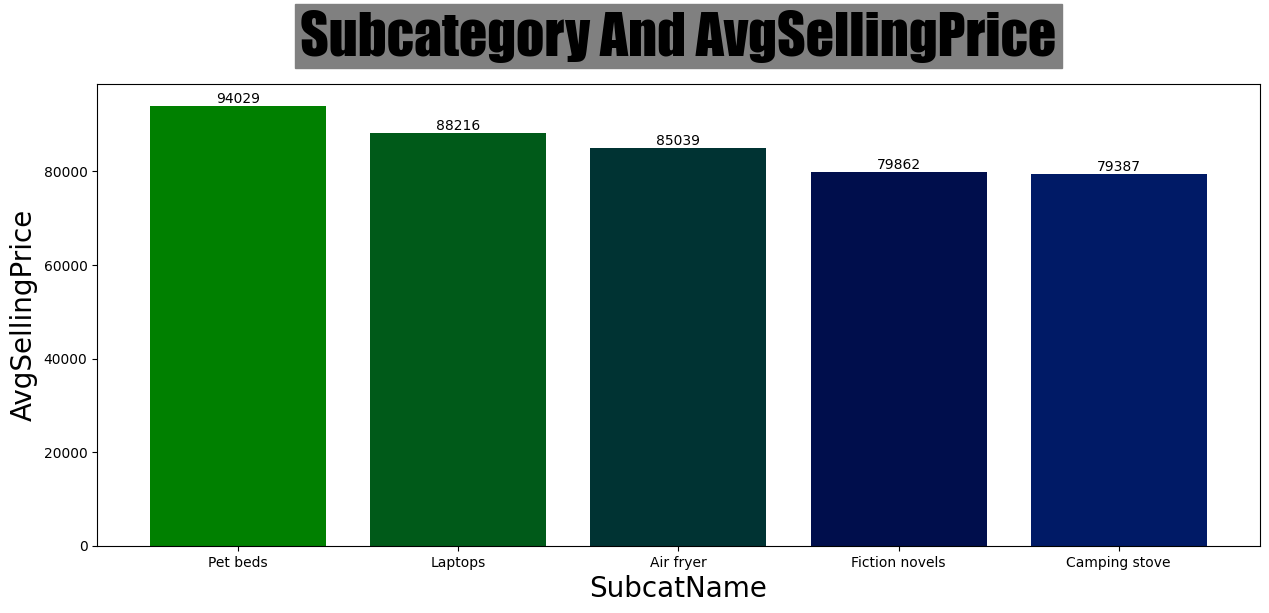

In [288]:
plt.figure(figsize = (15,6))

seq= np.linspace(0,1,11)
cm = plt.cm.ocean(seq)

plt.bar(df['SubcatName'],df['AvgSellingPrice'],color=cm)

for i in range(len(df['SubcatName'])):
    plt.annotate(text=df['AvgSellingPrice'][i],xy=(i,df['AvgSellingPrice'][i])
                 ,horizontalalignment='center',verticalalignment='bottom')


plt.title('Subcategory And AvgSellingPrice',fontsize = 40,color = 'black',
          backgroundcolor = 'grey',
          pad = 20,
          fontname = 'impact')
plt.xlabel('SubcatName',fontsize=20)
plt.ylabel('AvgSellingPrice',fontsize=20)
plt.show()

In [289]:
# 14.  What is the total revenue generated from sales in each category?

In [290]:
query = '''select categories.categoryid,CategoryName,sum(price) total_sales_price from subcategories
join 
(select subcatid,sum(totalprice) as price from salesdata
group by SubcatID) t
 on t.subcatid = subcategories.subcatid
join categories
on categories.CategoryID = subcategories.CategoryID
group by categories.CategoryID
order by total_sales_price desc
limit 3;'''

In [291]:
df= swiftmarket.select_query(query)

In [292]:
df

,categoryid,CategoryName,total_sales_price
0,500105,Pet Supplies and Accessories,361848986.00
1,500103,Health and Wellness Products,324761329.00
2,500100,Electronics and Gadgets,319374417.00


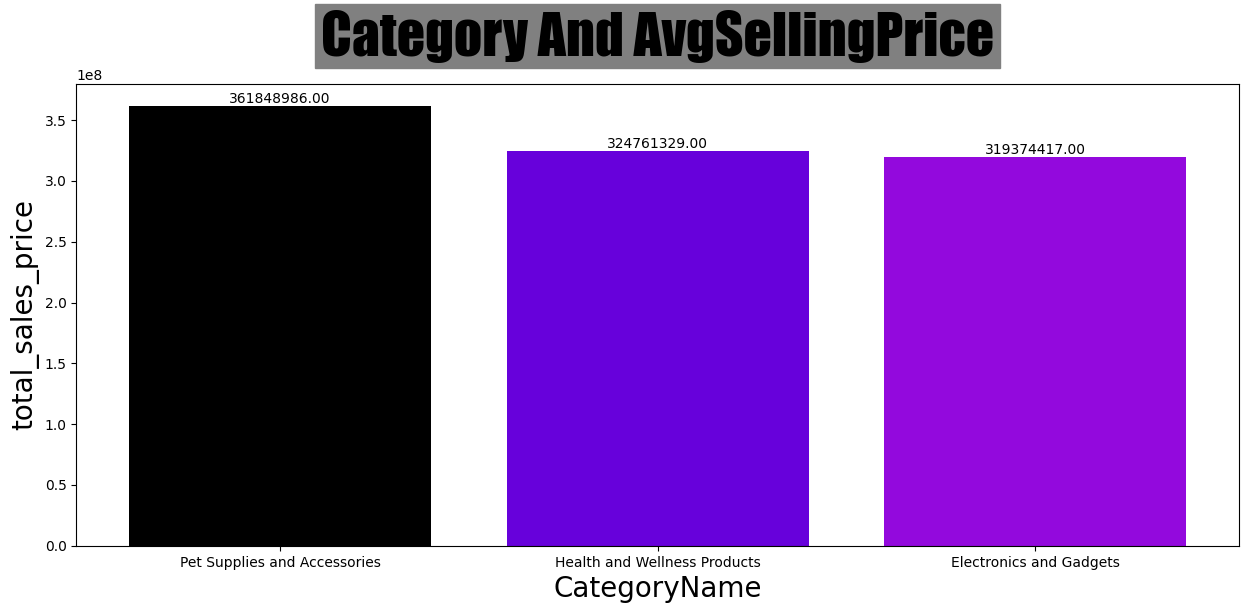

In [297]:
plt.figure(figsize = (15,6))

seq= np.linspace(0,1,7)
cm = plt.cm.gnuplot(seq)

plt.bar(df['CategoryName'],df['total_sales_price'],color=cm)

for i in range(len(df['CategoryName'])):
    plt.annotate(text=df['total_sales_price'][i],xy=(i,df['total_sales_price'][i])
                 ,horizontalalignment='center',verticalalignment='bottom')


plt.title('Category And AvgSellingPrice',fontsize = 40,color = 'black',
          backgroundcolor = 'grey',
          pad = 20,
          fontname = 'impact')
plt.xlabel('CategoryName',fontsize=20)
plt.ylabel('total_sales_price',fontsize=20)
plt.show()